In [32]:
   Image(url='https://t4.ftcdn.net/jpg/01/42/34/87/360_F_142348781_I6OPT1NpR1a4Kpyx1CFvzA3hEUUXNhtW.jpg', width=1000)

### 🔹 Importing required libraries


In [1]:
from IPython.display import Image

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#
### 🔹 Merge the 12 months of sales data into a single CSV file


In [2]:
files = [file for file in os.listdir(r'C:\Users\ZMZM\Desktop\Dataset\merge')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('C:/Users/ZMZM/Desktop/Dataset/merge/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv' , index=False)

#
### 🔹 Read in updated dataframe


In [3]:
all_data = pd.read_csv(r'C:\Users\ZMZM\Desktop\Dataset\all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.dropna(inplace=True)

In [5]:
all_data.shape

(186305, 6)

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [7]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [9]:
all_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
73855,147235,AAA Batteries (4-pack),1,2.99,01/31/19 08:40,"474 Main St, Los Angeles, CA 90001",01
145484,286795,AAA Batteries (4-pack),1,2.99,11/20/19 07:40,"850 Hill St, San Francisco, CA 94016",11
65554,160100,Lightning Charging Cable,1,14.95,02/11/19 09:14,"94 Church St, Austin, TX 73301",02
87714,232902,27in 4K Gaming Monitor,1,389.99,07/07/19 09:01,"731 Lake St, San Francisco, CA 94016",07
102530,220304,iPhone,1,700,06/04/19 09:15,"431 Wilson St, Portland, OR 97035",06
111134,167604,Wired Headphones,1,11.99,03/05/19 13:03,"984 Elm St, Los Angeles, CA 90001",03
96564,214591,27in 4K Gaming Monitor,1,389.99,06/11/19 14:44,"693 Forest St, New York City, NY 10001",06
165090,269196,AA Batteries (4-pack),3,3.84,10/17/19 12:16,"589 Elm St, San Francisco, CA 94016",10
109057,165619,Lightning Charging Cable,1,14.95,03/19/19 19:40,"805 Washington St, San Francisco, CA 94016",03
34473,299546,Wired Headphones,1,11.99,12/13/19 11:15,"512 Ridge St, Atlanta, GA 30301",12


In [10]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [11]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
all_data.duplicated().sum()

264

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [14]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


In [15]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
all_data.insert(4, 'Sales', all_data.pop("Sales"))

In [17]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [18]:
all_data.groupby('Month')['Sales'].sum().sort_values()

Month
1     1822256.73
9     2097560.13
2     2202022.42
8     2244467.88
6     2577802.26
7     2647775.76
3     2807100.38
5     3152606.75
11    3199603.20
4     3390670.24
10    3736726.88
12    4613443.34
Name: Sales, dtype: float64

<Axes: xlabel='Month', ylabel='Sales'>

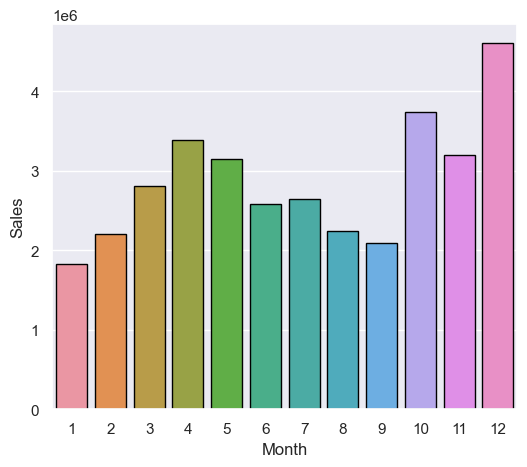

In [34]:
name = all_data.groupby(['Month'], as_index=False)['Sales'].sum().sort_values(by='Month', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
plt.grid(True)
sns.barplot(x = 'Month',y= 'Sales' ,data = name, edgecolor='black')


In [20]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [21]:
all_data.groupby('City')['Sales'].sum().sort_values()

City
Portland  (ME)          449758.27
Austin  (TX)           1819581.75
Portland  (OR)         1870732.34
Seattle  (WA)          2747755.48
Dallas  (TX)           2767975.40
Atlanta  (GA)          2795498.58
Boston  (MA)           3661642.01
New York City  (NY)    4664317.43
Los Angeles  (CA)      5452570.80
San Francisco  (CA)    8262203.91
Name: Sales, dtype: float64

<Axes: xlabel='City', ylabel='Sales'>

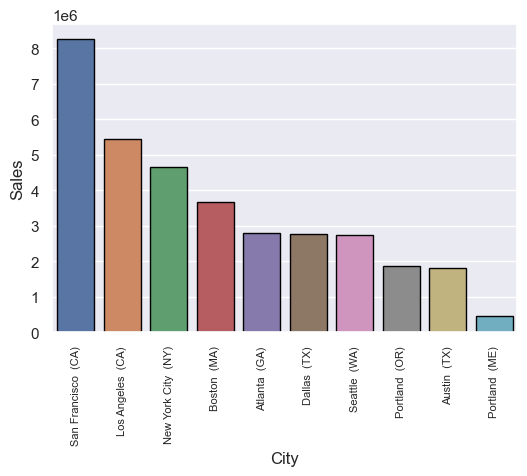

In [22]:
name = all_data.groupby(['City'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
sns.set(rc={'figure.figsize':(6,4)})
plt.grid(True)
plt.xticks(rotation='vertical', size=8)
sns.barplot(x = 'City',y= 'Sales' ,data = name, edgecolor='black')


In [23]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [24]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


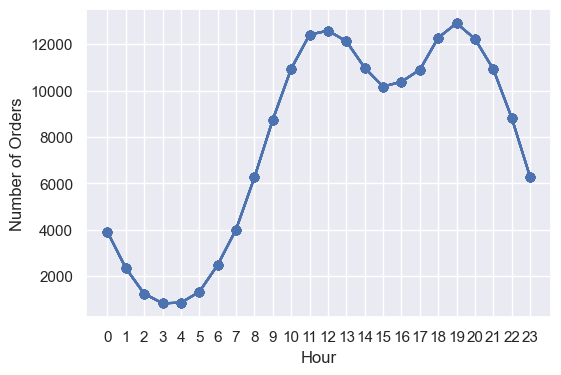

In [25]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count(), marker = 'o', c = 'b')
plt.xticks(hours)
plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

In [26]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,Hour,Minute
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.00,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.95,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),11,31
31,176585,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),11,31
32,176586,AAA Batteries (4-pack),2,2.99,5.98,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco (CA),17,0
33,176586,Google Phone,1,600.00,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,San Francisco (CA),17,0
119,176672,Lightning Charging Cable,1,14.95,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,New York City (NY),11,7
120,176672,USB-C Charging Cable,1,11.95,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,New York City (NY),11,7


### 🔹 What product sold the most? Why do you think it sold the most?


In [27]:
all_data.groupby('Product')['Quantity Ordered'].sum().sort_values()

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int64

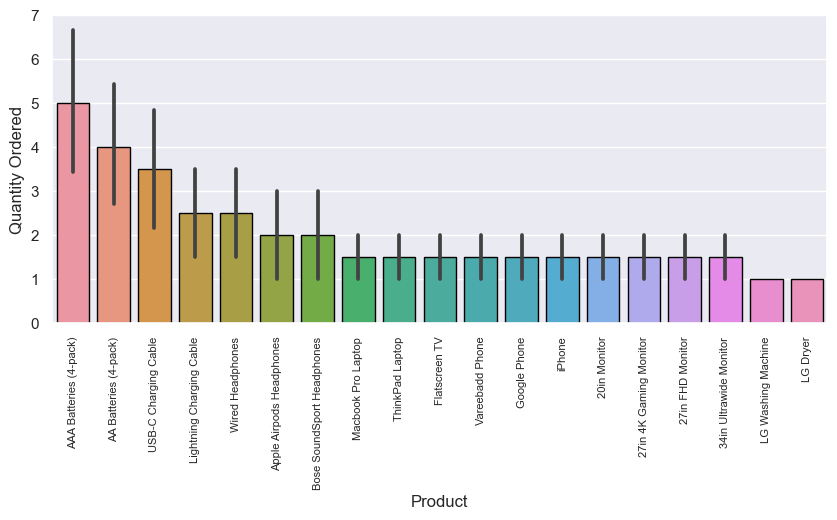

In [28]:
name = all_data.groupby(['Product'], as_index=False)['Quantity Ordered'].value_counts().sort_values(by='Quantity Ordered', ascending=False)
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(x = 'Product',y= 'Quantity Ordered' ,data = name, edgecolor='black')
plt.xticks(rotation='vertical', size=8)

plt.show()

### 🔹 What product are most often sold together?

In [29]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [30]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#

# Regards, Tariq Ibrahim